In [ ]:
#Mounting Drive to import the Data

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/stats_c161/train_data_ads.csv")

Mounted at /content/drive


In [ ]:
# Data Preprocessing
import pandas as pd

#Splitting data into x and y values - predicting label CTR -
x_train = train_df[:6140413]
x_train = x_train.drop(x_train.columns[:2], axis=1)
x_train = x_train.drop(x_train.columns[30:31], axis=1)
x_train = x_train.drop(x_train.columns[23:29], axis=1)
y_train = train_df[:6140413]
y_train = y_train.drop(y_train.columns[:1], axis=1)
y_train = y_train.iloc[:, :1]



x_test = train_df[6140413:]
x_test = x_test.drop(x_test.columns[:2], axis=1)
x_test = x_test.drop(x_test.columns[30:31], axis=1)
x_test = x_test.drop(x_test.columns[23:29], axis=1)
y_test = train_df[6140413:]
y_test = y_test.drop(y_test.columns[:1], axis=1)
y_test = y_test.iloc[:, :1]


In [ ]:
# Fitting XGBoost for Classification of CTR - getting mean cross-validated metrics

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

X = x_train
y = y_train

# Initialize the XGBoost classifier with fixed parameters
xgb_clf = xgb.XGBClassifier(learning_rate =  0.1, max_depth = 4, n_estimators = 150, objective='binary:logistic', eval_metric='logloss', random_state=404)

#Define the parameter grid for GridSearchCV
#param_grid = {
#    'max_depth': [2, 3, 4],
#    'learning_rate': [0.01, 0.1, 0.2],
#   'n_estimators': [50, 100, 150]
#}

# Initialize StratifiedKFold with a fixed random state for reproducibility
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=404)

# Initialize GridSearchCV with the classifier, parameter grid, and StratifiedKFold
#grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit GridSearchCV
#grid_search.fit(X, y)
#print("Best parameters found: ", grid_search.best_params_)
#best_xgb_clf = grid_search.best_estimator_
best_xgb_clf = xgb_clf

# Perform 10-fold cross-validation on the entire dataset with the best estimator
accuracy_scores = []
roc_auc_scores = []
precision_scores = []
specificity_scores = []
recall_scores = []


for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the best model
    best_xgb_clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = best_xgb_clf.predict(X_test)
    y_pred_proba = best_xgb_clf.predict_proba(X_test)[:, 1]

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)

    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)  # Store recall score

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f"Mean cross-validated accuracy: {mean_accuracy}")
print(f"Standard deviation of cross-validated accuracy: {std_accuracy}")

# Calculate mean and standard deviation of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)
print(f"Mean cross-validated ROC AUC score: {mean_roc_auc}")
print(f"Standard deviation of cross-validated ROC AUC score: {std_roc_auc}")

# Calculate mean and standard deviation of precision scores
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
print(f"Mean cross-validated precision: {mean_precision}")
print(f"Standard deviation of cross-validated precision: {std_precision}")

# Calculate mean and standard deviation of specificity scores
mean_specificity = np.mean(specificity_scores)
std_specificity = np.std(specificity_scores)
print(f"Mean cross-validated specificity: {mean_specificity}")
print(f"Standard deviation of cross-validated specificity: {std_specificity}")

#Recall
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
print(f"Mean cross-validated recall: {mean_recall}")
print(f"Standard deviation of cross-validated recall: {std_recall}")




Mean cross-validated accuracy: 0.9845959872733989
Standard deviation of cross-validated accuracy: 2.8241594096645956e-06
Mean cross-validated ROC AUC score: 0.7940036501734584
Standard deviation of cross-validated ROC AUC score: 0.002043225236011312
Mean cross-validated precision: 0.5323809523809524
Standard deviation of cross-validated precision: 0.106064413749125
Mean cross-validated specificity: 0.9999928876479949
Standard deviation of cross-validated specificity: 3.775405887218117e-06
Mean cross-validated recall: 0.0005180061630175585
Standard deviation of cross-validated recall: 0.0002608674690856981


In [ ]:
y_train.value_counts()

,count
label,
0,6045820
1,94593


In [ ]:
# Using the fitted model from above testing on the test data above getting the metric outputs


#xgb_clf = xgb.XGBClassifier(learning_rate= .1, max_depth= 4, n_estimators = 150, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=404)

#xgb_clf.fit(x_train, y_train)

# Predict on the test set
y_pred = best_xgb_clf.predict(x_test)
y_pred_proba = best_xgb_clf.predict_proba(x_test)[:, 1]

print(y_pred_proba)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Roc AUC: {roc_auc}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

#Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

[0.00783364 0.00895196 0.00137333 ... 0.01002157 0.02045812 0.01076711]
Accuracy: 0.9840115067122488
Roc AUC: 0.7827641642287189
Precision: 0.47368421052631576
Specificity: 0.9999933799429483
Recall: 0.0003667033370003667


In [ ]:
y_test.shape

(1535104, 1)

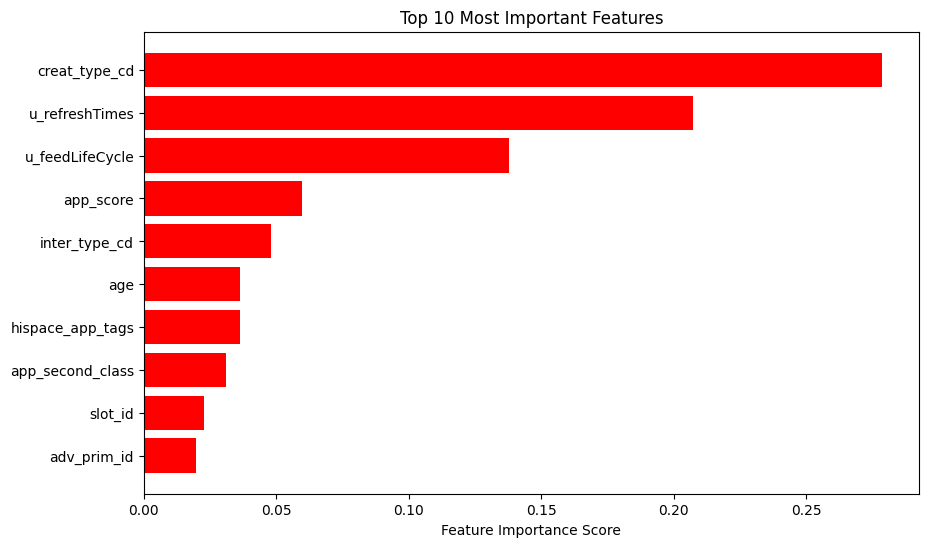

In [ ]:
#Feature importance for test data

# feature importances from the trained model
feature_importances = best_xgb_clf.feature_importances_

# feature names and their importance scores
feature_names = x_test.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance and top 10 features
top_features = importance_df.sort_values(by="importance", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='red')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Most Important Features')
plt.show()